In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 
import os
owd = os.getcwd()
os.chdir('../src/features')
import preprocess as pp
os.chdir(owd)

In [2]:
conn = sqlite3.connect('../src/data/td_V2.db')
git_commits = pd.read_sql_query("SELECT * FROM GIT_COMMITS",conn)
szz_fault_inducing_commits = pd.read_sql_query("SELECT * FROM szz_fault_inducing_commits",conn)
refactoring_miner = pd.read_sql_query("SELECT * FROM refactoring_miner",conn)
refactoring_miner = refactoring_miner[refactoring_miner["COMMIT_HASH"].isin(git_commits["COMMIT_HASH"])]

In [3]:
#clean_df = pd.read_csv("../src/data/td_V2_clean.csv", encoding='utf8', engine='python')
clean_df = pp.preprocess(git_commits, szz_fault_inducing_commits, refactoring_miner)

In [4]:
clean_df = clean_df[clean_df["FAULT_INDUCING_COMMIT_HASH"].isin(szz_fault_inducing_commits["FAULT_INDUCING_COMMIT_HASH"])]
clean_df

,REFACTORING_TYPE,FAULT_FIXING_COMMIT_HASH,FAULT_INDUCING_COMMIT_HASH,PROJECT_ID,COMMIT_MESSAGE,COMMITTER_DATE,BRANCHES
0,Move Class,1d528f6cf7ea74db01a03d724f288dd97b2c3f35,d522432b79044740831a132d8b92e7dab5477444,org.apache:bcel,[BCEL-328] java.util.EmptyStackException at or...,2019-09-25 20:09:42-04:00,{'master'}
1,Rename Parameter,1d528f6cf7ea74db01a03d724f288dd97b2c3f35,011d22895719c182ad3ddce859756154a2eb7a37,org.apache:bcel,[BCEL-328] java.util.EmptyStackException at or...,2019-09-25 20:09:42-04:00,{'master'}
2,Change Package,1d528f6cf7ea74db01a03d724f288dd97b2c3f35,f3f9e9b02c101973da0ed1a51e5dd60b83e5bc65,org.apache:bcel,[BCEL-328] java.util.EmptyStackException at or...,2019-09-25 20:09:42-04:00,{'master'}
3,Move Class,93c12bbb6d22a165a407b6184cdb40545f86c683,d522432b79044740831a132d8b92e7dab5477444,org.apache:bcel,BCEL-287: IINC does not handle -128 properly. ...,2017-08-30 19:28:20+00:00,{'master'}
4,Extract Class,93c12bbb6d22a165a407b6184cdb40545f86c683,02f53e4fa6ec7fa339c8c9273183669d7f5928c9,org.apache:bcel,BCEL-287: IINC does not handle -128 properly. ...,2017-08-30 19:28:20+00:00,{'master'}
...,...,...,...,...,...,...,...
19281,Move Source Folder,2845b16eb24fc66d34f66c776400354225e70bad,249d7cb199b5c08e7a7a51189a733cc8fef12cf9,org.apache:thrift,THRIFT-565. java: Structs containing typedefs ...,2009-11-09 15:55:22+00:00,{'master'}
19282,Move Source Folder,2fde9eee6f155ff23d938256d3c9db9c93a21b77,249d7cb199b5c08e7a7a51189a733cc8fef12cf9,org.apache:thrift,THRIFT-971 java module can't be compiled witho...,2010-10-27 19:19:04+00:00,{'master'}
19283,Move Source Folder,787538943be3c40a55b971c47882e8b19d4b5823,249d7cb199b5c08e7a7a51189a733cc8fef12cf9,org.apache:thrift,THRIFT-482. java: build.xml does not specify a...,2009-05-06 17:22:11+00:00,{'master'}
19284,Move Class,796381d857f3a51fd1b059200425c84326cbcfe3,afa80ea73d4cbf83afee807e5d9f9034fa177ade,org.apache:thrift,THRIFT-290. java: Metadata map doesn't properl...,2009-01-29 22:13:56+00:00,{'master'}


In [5]:
szz_fault_inducing_commits

,PROJECT_ID,FAULT_FIXING_COMMIT_HASH,FAULT_INDUCING_COMMIT_HASH
0,org.apache:archiva,fa3688a693bc10bf53e72965027a82df0a8ad267,b7c003acb6b2c2a930443c511cb087d2776b4891
1,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,5f9755b5ae526a83ecdd219401c97498b223b776
2,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,9e37277c4a5d4c353f71ec5060951c554f20bab5
3,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,28898793f51c03b1259d3a1b1f1612f450cf634c
4,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,44dd185dade958e4c24014d84db71f870c714fcb
...,...,...,...
52423,org.apache:httpcore,4c9fbd27bac88ee64e3ad3e64b8f3b3e4a5d6621,65e51b1a59fef1598c26a9f2603bbe540c89bcfd
52424,org.apache:httpcore,94aa6822ea2fafc3324438282a0800f8ef3749d5,0cc32f7232d1c66121554cc65e1cfa54c1549c54
52425,org.apache:httpcore,ae3953384791eb7dcfd6dd98fd388881a2ee5abf,0cc32f7232d1c66121554cc65e1cfa54c1549c54
52426,org.apache:httpcore,a03b1ecaf714a199f8123db8e14b70dac376c170,0cc32f7232d1c66121554cc65e1cfa54c1549c54


In [6]:
fault_refactor = len(clean_df["FAULT_INDUCING_COMMIT_HASH"].unique())
fault_no_refactor = sum(~pd.Series(szz_fault_inducing_commits["FAULT_INDUCING_COMMIT_HASH"].unique()).isin(clean_df["FAULT_INDUCING_COMMIT_HASH"].unique()))

In [7]:
fault_no_refactor, fault_refactor

(15655, 1671)

In [8]:
commit_refactor = len(refactoring_miner["COMMIT_HASH"].unique())
commit_no_refactor = sum(~pd.Series(git_commits["COMMIT_HASH"].unique()).isin(refactoring_miner["COMMIT_HASH"].unique()))

In [9]:
commit_refactor, commit_no_refactor

(7197, 146797)

In [10]:
print(round(fault_refactor/commit_refactor, 2), '% of faults in refactor commits', sep = '')

0.23% of faults in refactor commits


In [11]:
print(round(fault_no_refactor/commit_no_refactor, 2), '% of faults in non-refactor commits', sep = '')

0.11% of faults in non-refactor commits


In [12]:
szz_fault_inducing_commits.head()

,PROJECT_ID,FAULT_FIXING_COMMIT_HASH,FAULT_INDUCING_COMMIT_HASH
0,org.apache:archiva,fa3688a693bc10bf53e72965027a82df0a8ad267,b7c003acb6b2c2a930443c511cb087d2776b4891
1,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,5f9755b5ae526a83ecdd219401c97498b223b776
2,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,9e37277c4a5d4c353f71ec5060951c554f20bab5
3,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,28898793f51c03b1259d3a1b1f1612f450cf634c
4,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,44dd185dade958e4c24014d84db71f870c714fcb


In [13]:
# study of the percentage of faults caused by refactor and non-refactor commits by project
faults_project = []
for i in szz_fault_inducing_commits.PROJECT_ID.unique():
    #print('Project:', i)
    fault_refactor = len(clean_df[clean_df.PROJECT_ID==i]["FAULT_INDUCING_COMMIT_HASH"].unique())
    fault_no_refactor = sum(~pd.Series(szz_fault_inducing_commits[szz_fault_inducing_commits.PROJECT_ID==i]["FAULT_INDUCING_COMMIT_HASH"].unique()).isin(clean_df[clean_df.PROJECT_ID==i]["FAULT_INDUCING_COMMIT_HASH"].unique()))
    commit_refactor = len(refactoring_miner[refactoring_miner.PROJECT_ID==i]["COMMIT_HASH"].unique())
    commit_no_refactor = sum(~pd.Series(git_commits[git_commits.PROJECT_ID==i]["COMMIT_HASH"].unique()).isin(refactoring_miner[refactoring_miner.PROJECT_ID==i]["COMMIT_HASH"].unique()))
    #print(round(fault_refactor/commit_refactor, 2), '% of faults in refactor commits', sep = '')
    #print(round(fault_no_refactor/commit_no_refactor, 2), '% of faults in non-refactor commits\n', sep = '')
    faults_project.append([i,fault_refactor/commit_refactor,fault_no_refactor/commit_no_refactor])

In [14]:
faults_project = pd.DataFrame(faults_project).rename(columns={0:'project_id',1:'faults_refactor',2:'faults_non_refactor'})
faults_project.head()

,project_id,faults_refactor,faults_non_refactor
0,org.apache:archiva,0.489362,0.135788
1,org.apache:batik,0.000000,0.074253
2,org.apache:bcel,0.176471,0.047962
3,org.apache:beanutils,0.360000,0.131579
4,org.apache:cayenne,0.432203,0.207407


In [15]:
faults_project.sort_values('faults_refactor', ascending=False).set_index('project_id')

,faults_refactor,faults_non_refactor
project_id,,
org.apache:zookeeper,0.785942,0.418457
org.apache:thrift,0.666667,0.391496
org.apache:httpclient,0.558499,0.236870
org.apache:jxpath,0.500000,0.087850
org.apache:archiva,0.489362,0.135788
org.apache:commons-jexl,0.488889,0.143675
org.apache:dbutils,0.482759,0.040789
org.apache:commons-io,0.457143,0.164811
org.apache:dbcp,0.450292,0.143854


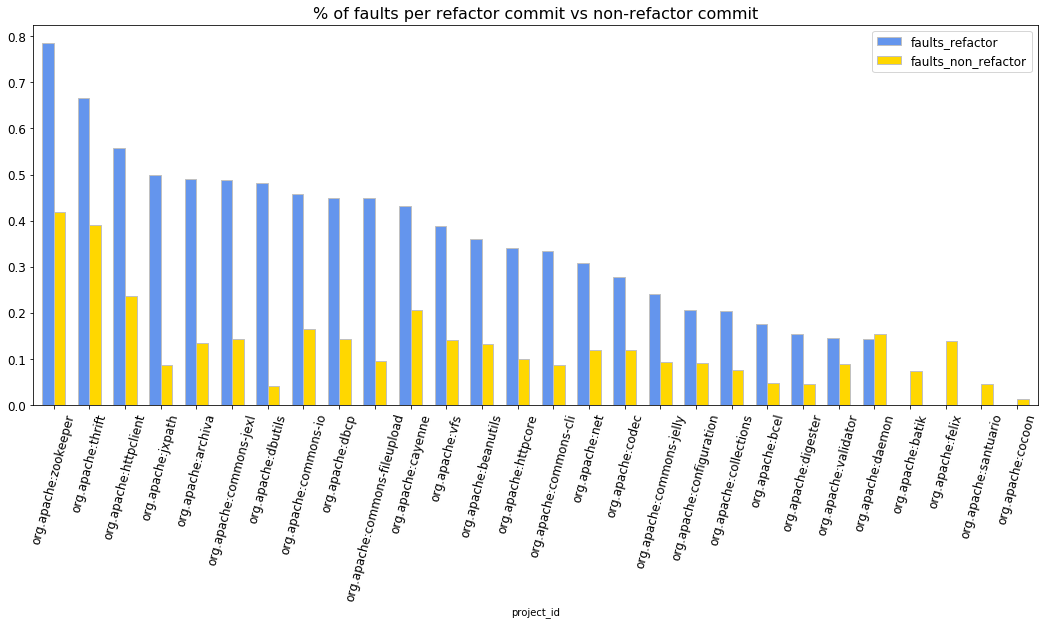

In [16]:
faults_project.sort_values('faults_refactor', ascending=False).set_index('project_id').plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=12, \
                                            color=('cornflowerblue','gold'),edgecolor = 'silver')
plt.title('% of faults per refactor commit vs non-refactor commit', fontsize=16)
plt.legend(fontsize=12)

In [17]:
refactoring_miner.head()

,PROJECT_ID,COMMIT_HASH,REFACTORING_TYPE,REFACTORING_DETAIL
0,org.apache:batik,adbabd6f8adad3f9df936a5d61bc2984006d0666,Move Class,Move Class\torg.apache.batik.util.XMLConstants...
1,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.CustomEvent mov...
2,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.KeyboardEvent m...
3,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.MutationNameEve...
4,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.TextEvent moved...


In [18]:
# study of the faults caused by refactors by type of refactor
faults_refactor_type = []
faults_refactor_type_count = []

refactoring_miner.REFACTORING_TYPE.value_counts()
for i in refactoring_miner.REFACTORING_TYPE.unique():
    #print('Refactoring type:', i)
    fault_refactor = len(clean_df[clean_df.REFACTORING_TYPE==i]["FAULT_INDUCING_COMMIT_HASH"].unique())
    commit_refactor = len(refactoring_miner[refactoring_miner.REFACTORING_TYPE==i]["COMMIT_HASH"].unique())
    #print(round(fault_refactor/commit_refactor, 2), '% of faults in refactor commits\n', sep = '')
    faults_refactor_type.append([i, fault_refactor/commit_refactor])
    faults_refactor_type_count.append([i, fault_refactor])

In [19]:
faults_refactor_type = pd.DataFrame(faults_refactor_type).rename(columns={0:'refactor_type',1:'percent_faults'})
faults_refactor_type.head()

,refactor_type,percent_faults
0,Move Class,0.201835
1,Move Source Folder,0.068584
2,Rename Method,0.249867
3,Rename Package,0.189189
4,Extract Method,0.256757


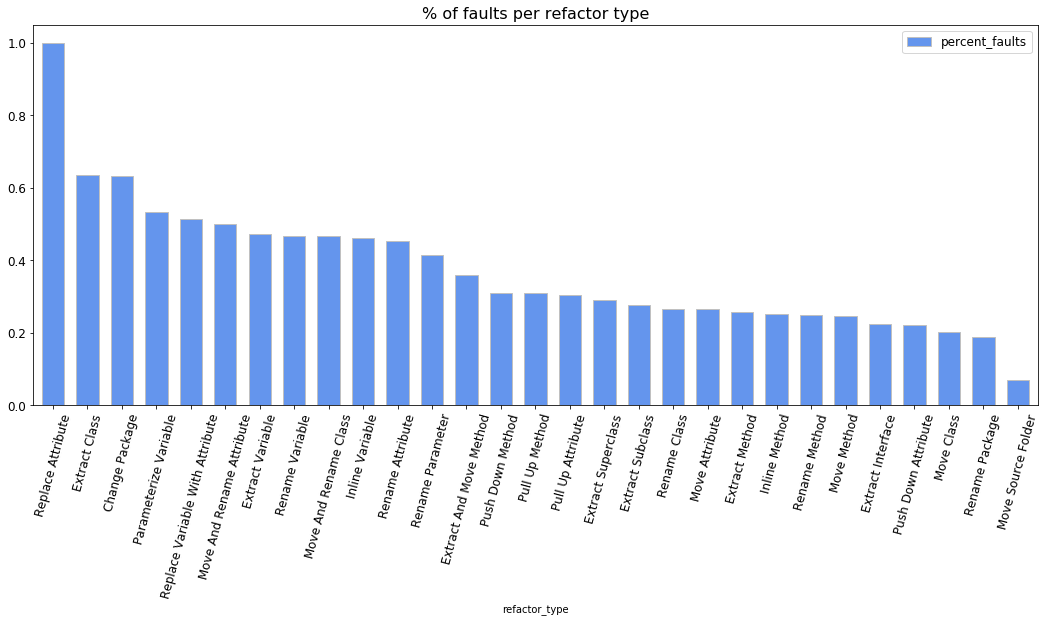

In [20]:
faults_refactor_type.sort_values('percent_faults', ascending=False).set_index('refactor_type').plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=12, \
                                            color=('cornflowerblue'),edgecolor = 'silver')
plt.title('% of faults per refactor type', fontsize=16)
plt.legend(fontsize=12)

In [21]:
faults_refactor_type_count = pd.DataFrame(faults_refactor_type_count).rename(columns={0:'refactor_type',1:'faults'})
faults_refactor_type_count.head()

,refactor_type,faults
0,Move Class,154
1,Move Source Folder,31
2,Rename Method,471
3,Rename Package,14
4,Extract Method,532


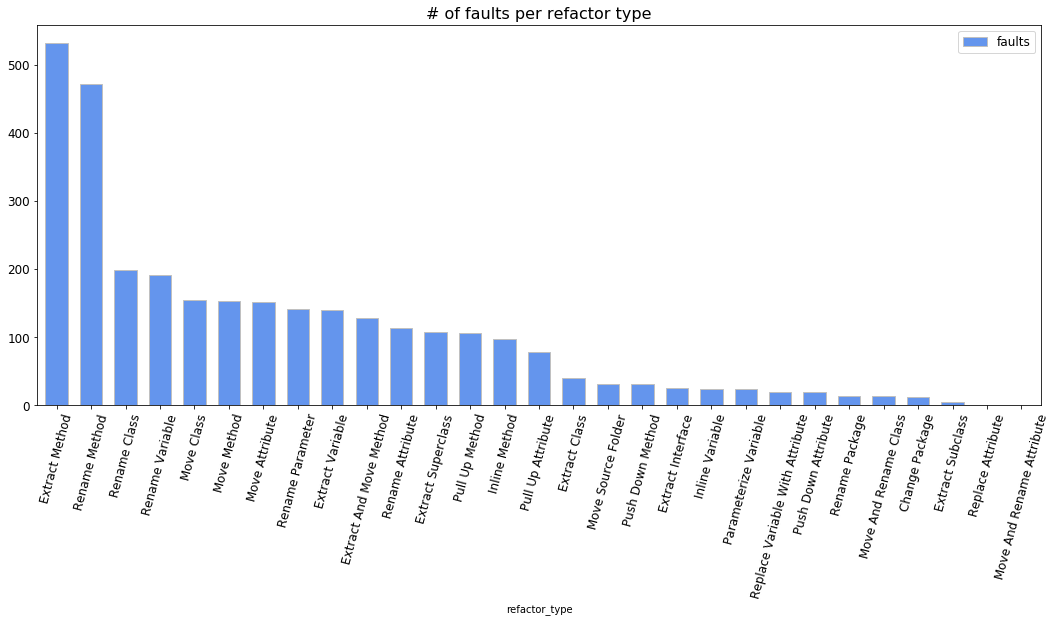

In [22]:
faults_refactor_type_count.sort_values('faults', ascending=False).set_index('refactor_type').plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=12, \
                                            color=('cornflowerblue'),edgecolor = 'silver')
plt.title('# of faults per refactor type', fontsize=16)
plt.legend(fontsize=12)

In [23]:
projects_faults = {}

for i in szz_fault_inducing_commits.PROJECT_ID.unique():
    aux = {}
    for j in refactoring_miner.REFACTORING_TYPE.unique():
        faults = len(clean_df[(clean_df.PROJECT_ID==i) & (clean_df.REFACTORING_TYPE==j)]["FAULT_INDUCING_COMMIT_HASH"].unique())
        aux[j] = faults
    projects_faults[i] = aux
    
pd.DataFrame(projects_faults).head()

,org.apache:archiva,org.apache:batik,org.apache:bcel,org.apache:beanutils,org.apache:cayenne,org.apache:cocoon,org.apache:codec,org.apache:collections,org.apache:commons-cli,org.apache:commons-fileupload,...,org.apache:felix,org.apache:jxpath,org.apache:net,org.apache:santuario,org.apache:thrift,org.apache:validator,org.apache:vfs,org.apache:zookeeper,org.apache:httpclient,org.apache:httpcore
Move Class,25,0,1,0,2,0,0,11,0,1,...,0,5,1,0,6,1,4,20,30,25
Move Source Folder,2,0,0,2,1,0,1,0,0,0,...,0,0,0,0,2,0,1,2,5,1
Rename Method,61,0,1,6,22,0,12,23,3,1,...,0,16,9,0,4,3,27,36,91,64
Rename Package,5,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,5,2
Extract Method,55,0,0,7,13,0,11,19,4,4,...,0,15,16,0,9,3,41,103,64,42


In [24]:
projects_refactor = {}

for i in refactoring_miner.PROJECT_ID.unique():
    aux = {}
    for j in refactoring_miner.REFACTORING_TYPE.unique():
        faults = len(refactoring_miner[(refactoring_miner.PROJECT_ID==i) & (refactoring_miner.REFACTORING_TYPE==j)]["COMMIT_HASH"].unique())
        aux[j] = faults
    projects_refactor[i] = aux
    
pd.DataFrame(projects_refactor).head()

,org.apache:batik,org.apache:cocoon,org.apache:bcel,org.apache:beanutils,org.apache:commons-cli,org.apache:codec,org.apache:collections,org.apache:configuration,org.apache:daemon,org.apache:dbcp,...,org.apache:vfs,org.apache:felix,org.apache:httpclient,org.apache:httpcore,org.apache:santuario,org.apache:zookeeper,org.apache:archiva,org.apache:hive,org.apache:cayenne,org.apache:thrift
Move Class,44,136,4,1,1,1,29,21,0,4,...,10,176,50,87,14,26,58,8,5,8
Move Source Folder,32,154,3,5,2,3,4,2,1,1,...,14,78,20,16,3,16,14,4,2,3
Rename Method,96,258,10,12,10,47,111,101,1,20,...,55,333,148,162,70,42,99,37,46,7
Rename Package,2,13,0,0,0,0,0,0,0,0,...,0,22,11,15,1,0,6,2,0,0
Extract Method,153,211,16,25,14,34,58,170,1,25,...,81,407,105,106,92,119,106,35,24,11


/Users/marinarosell/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


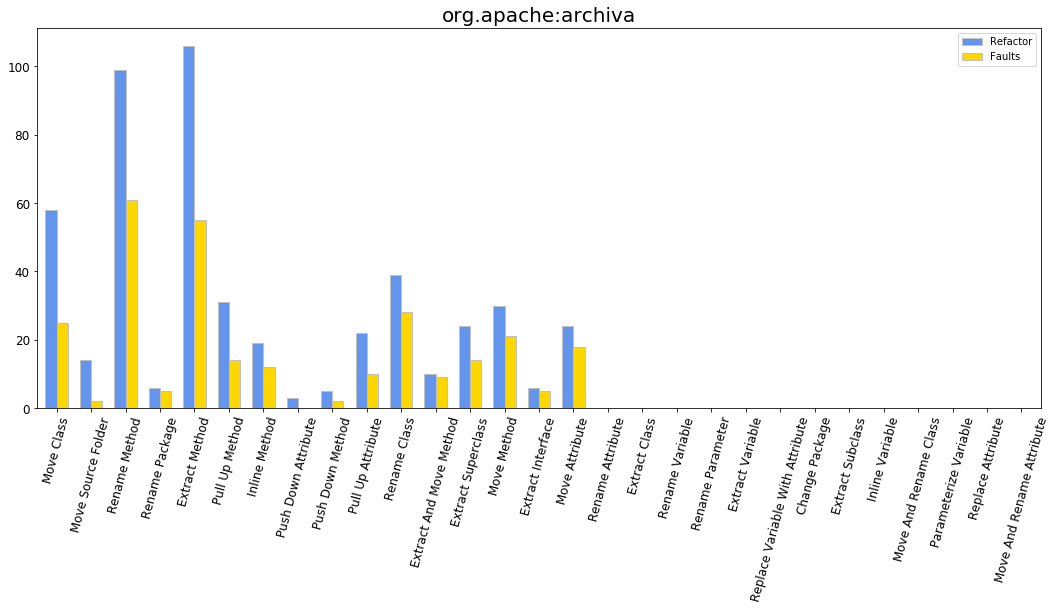

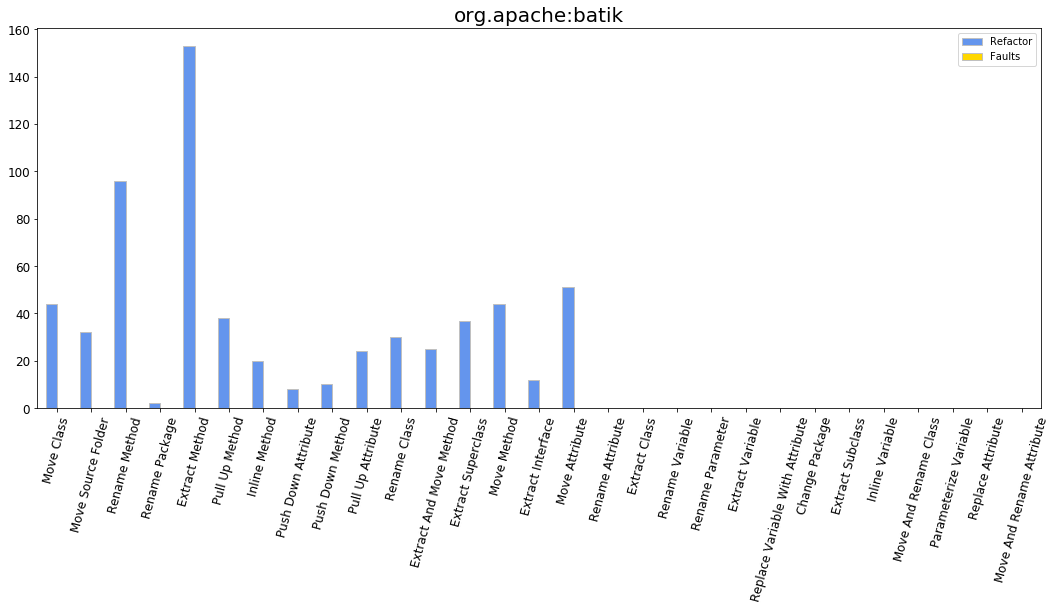

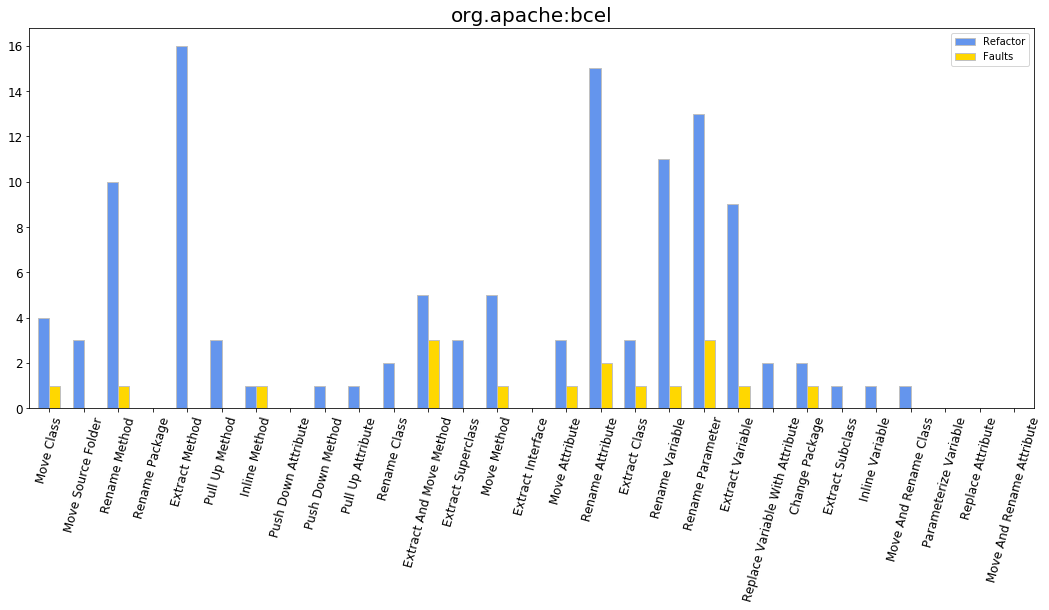

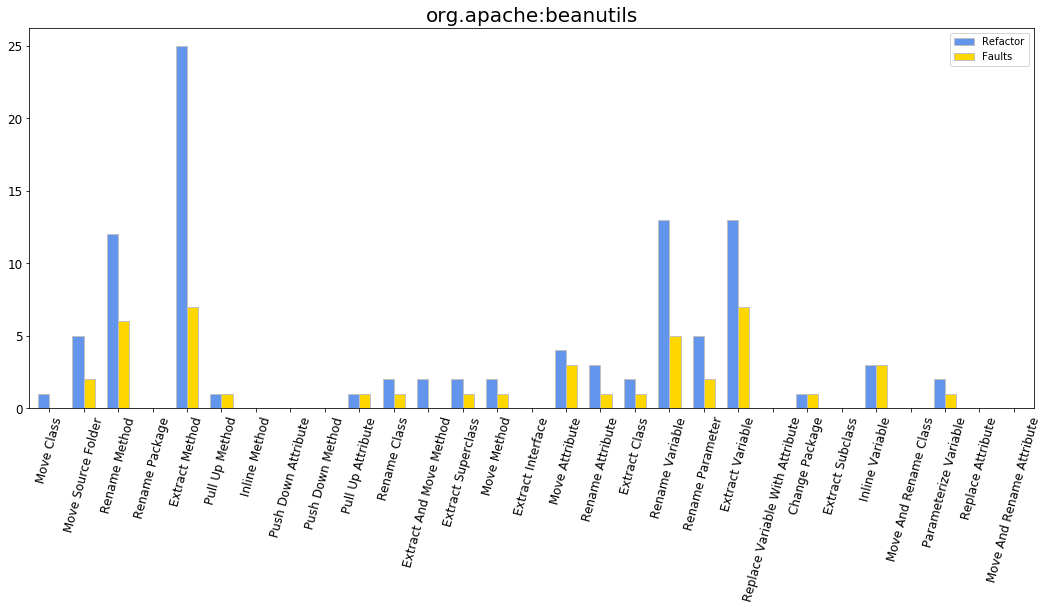

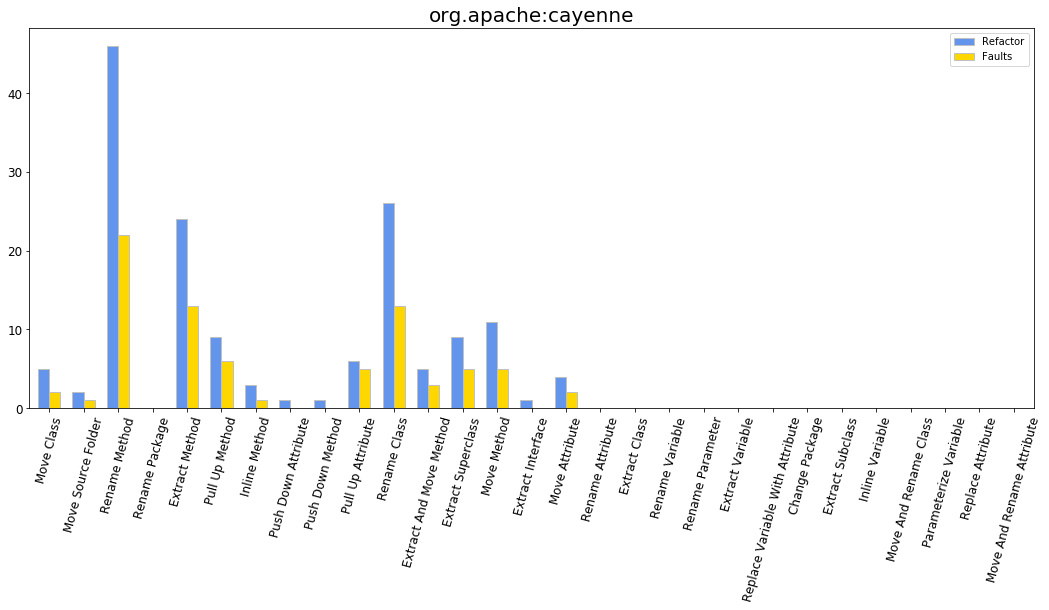

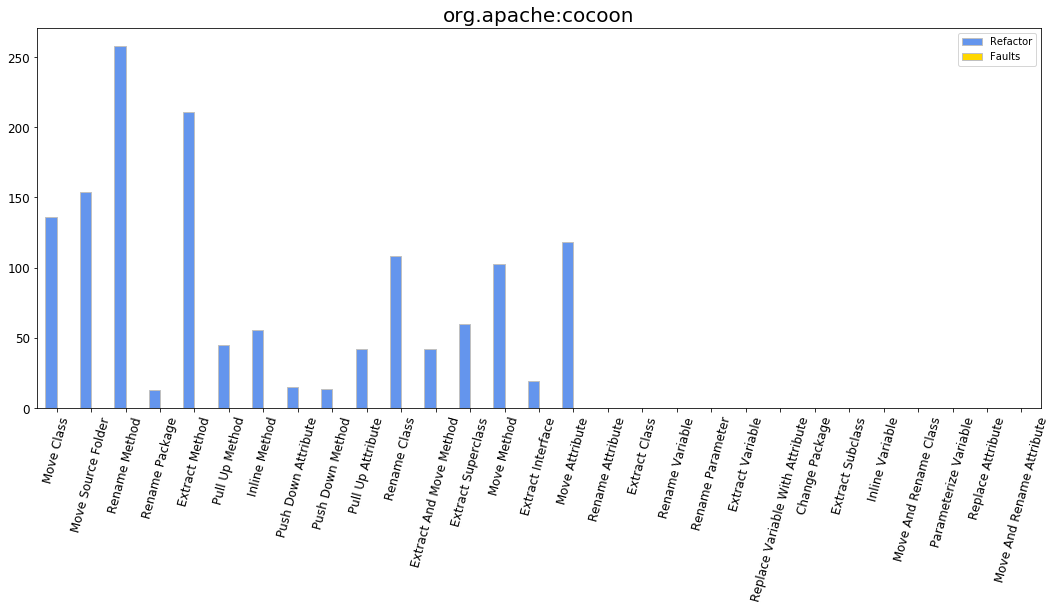

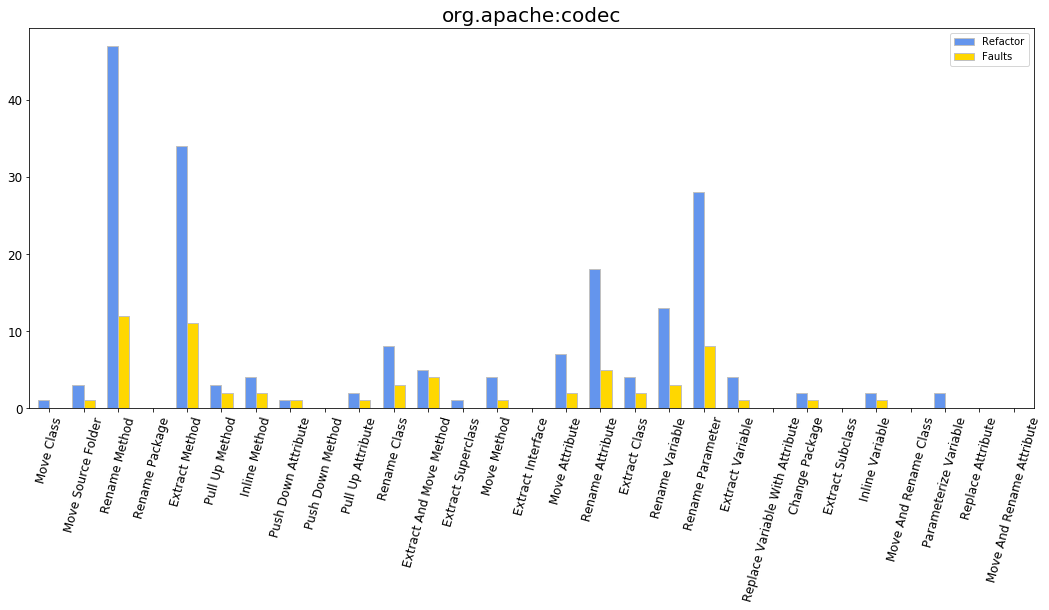

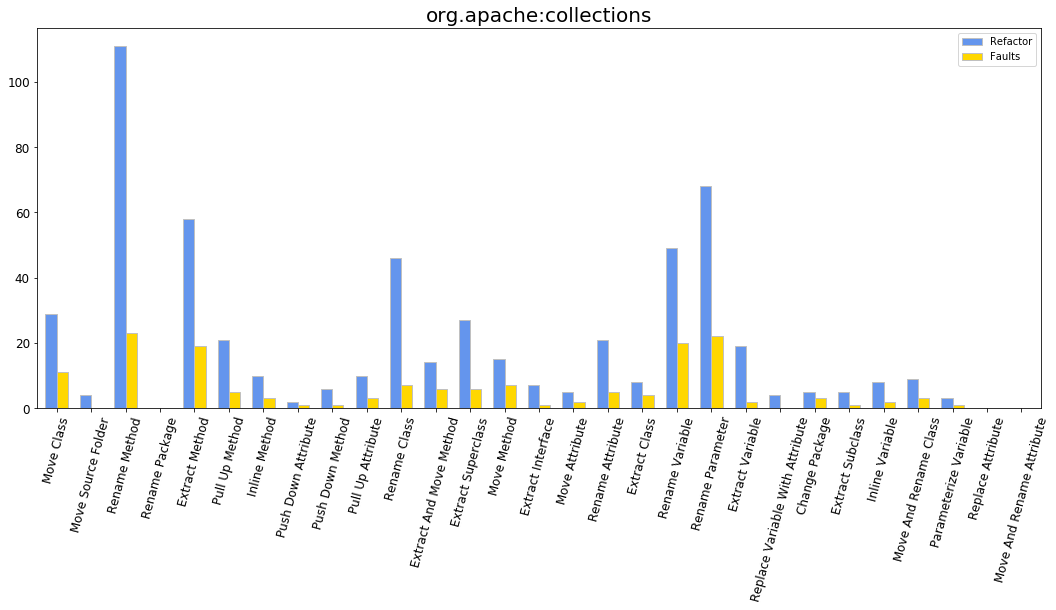

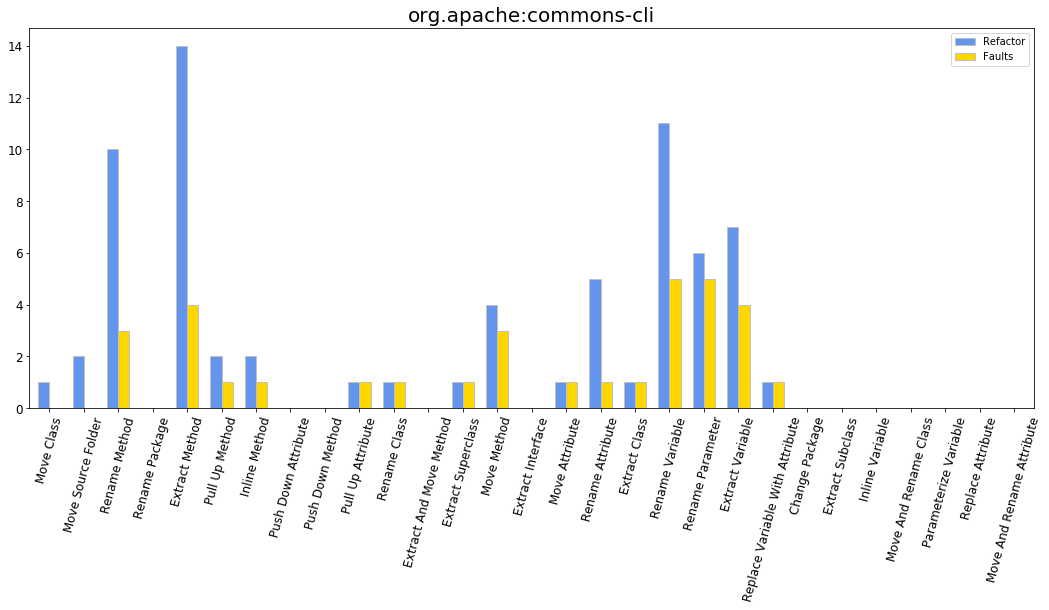

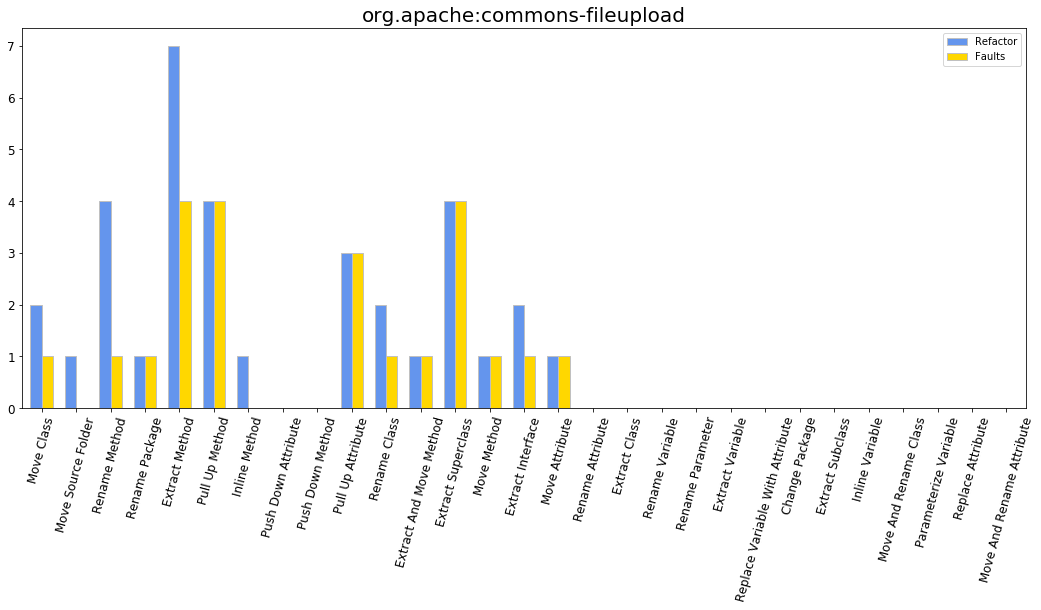

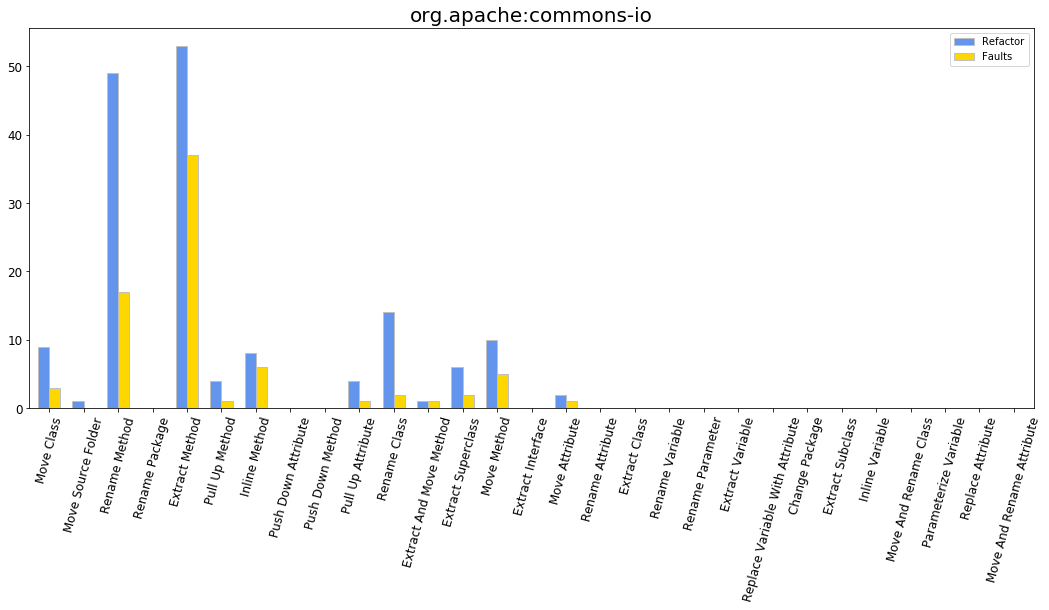

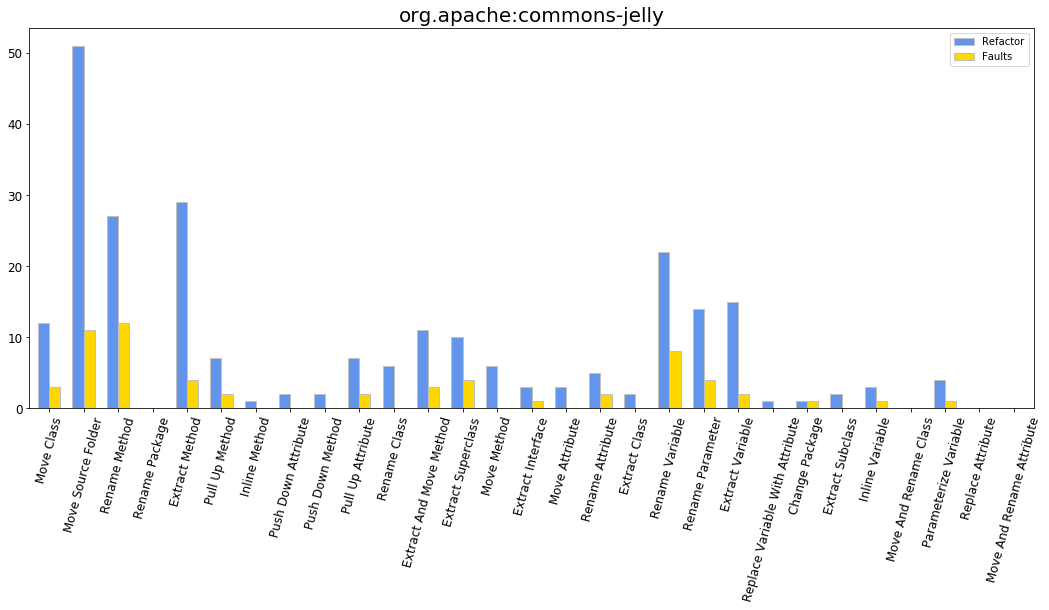

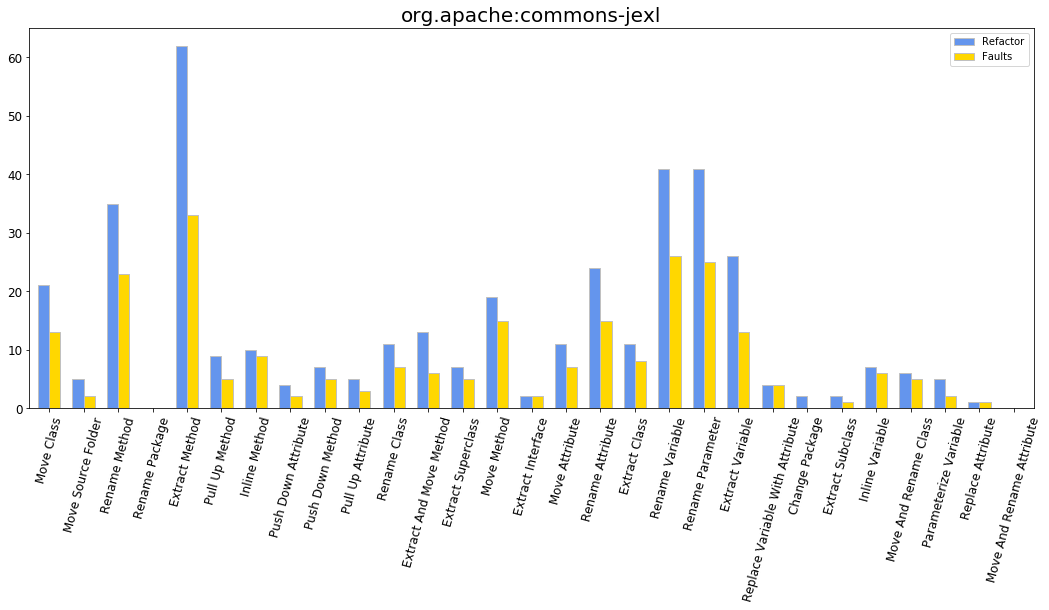

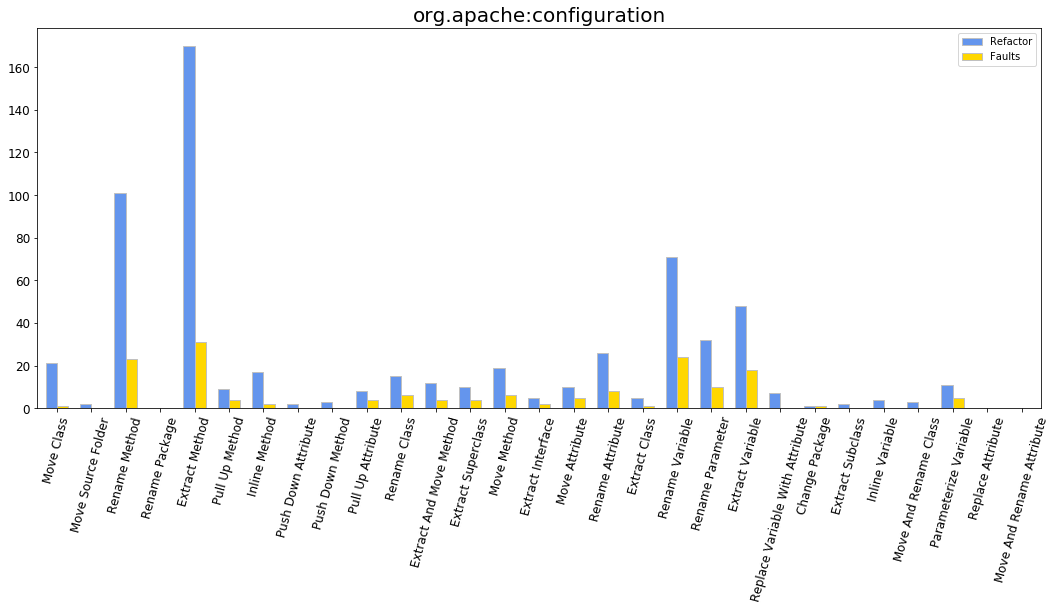

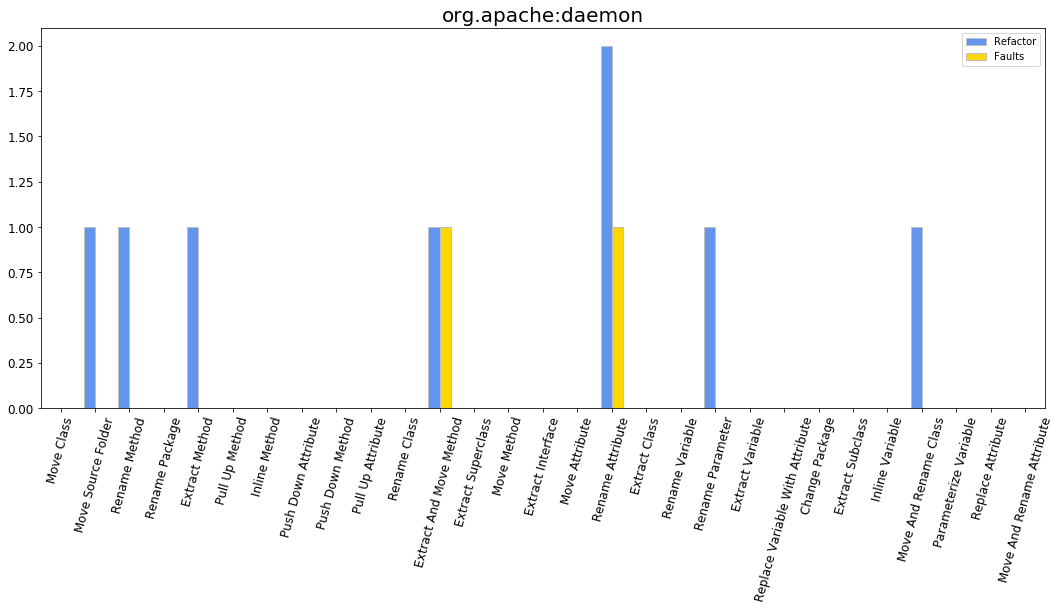

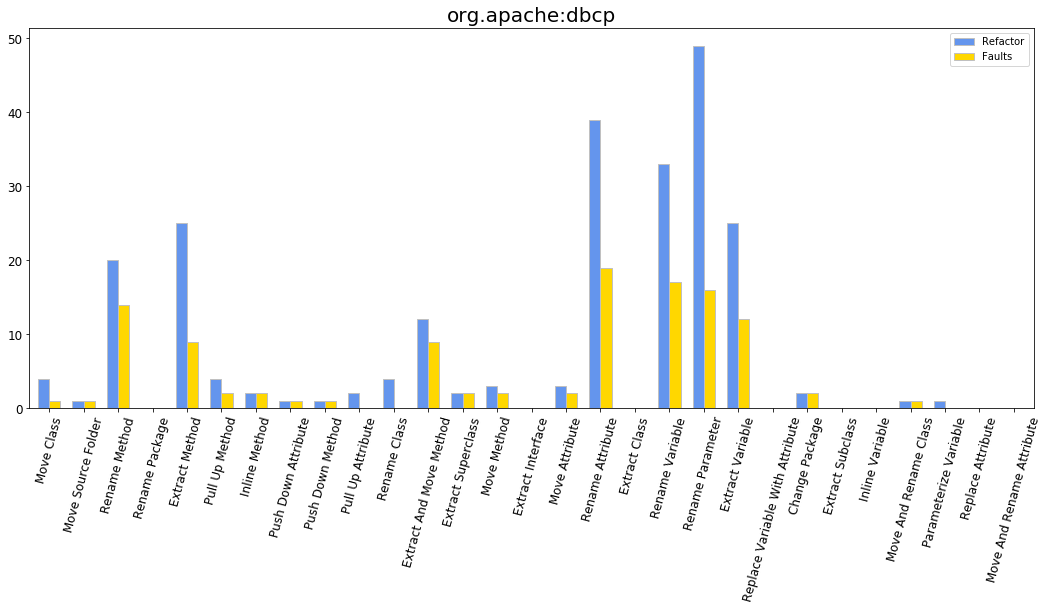

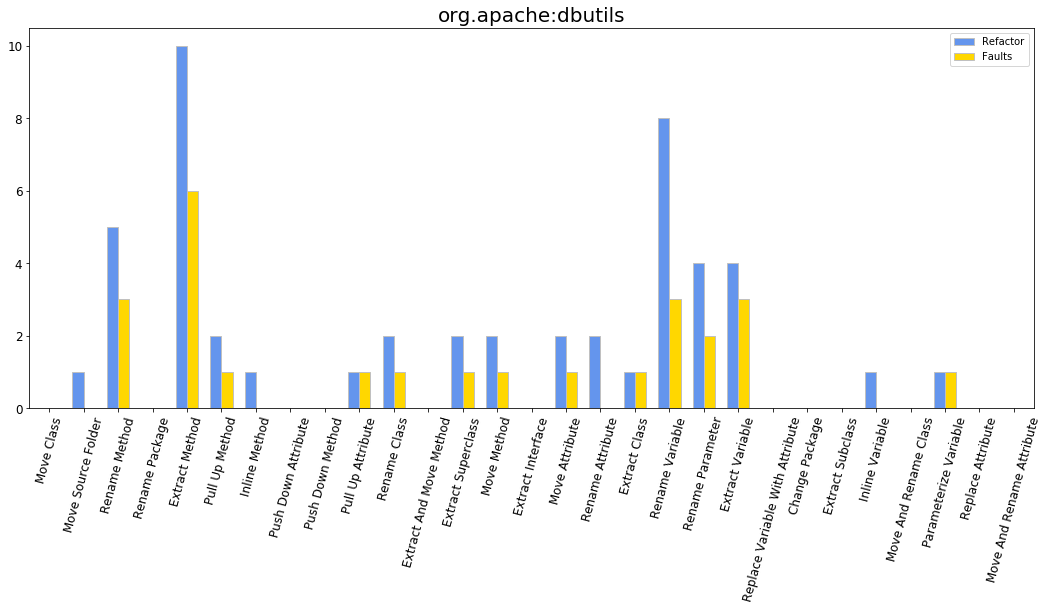

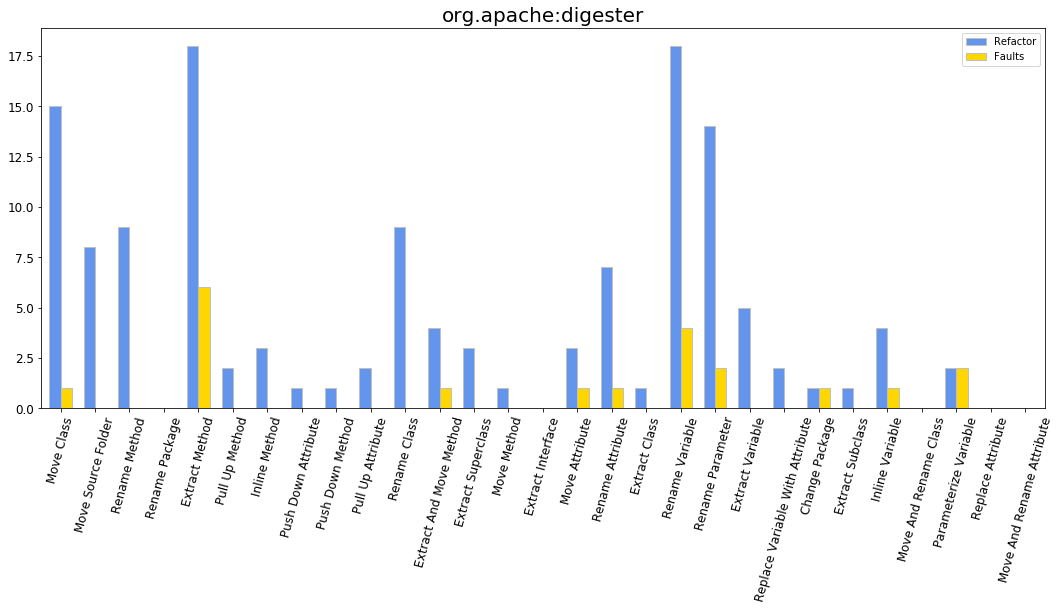

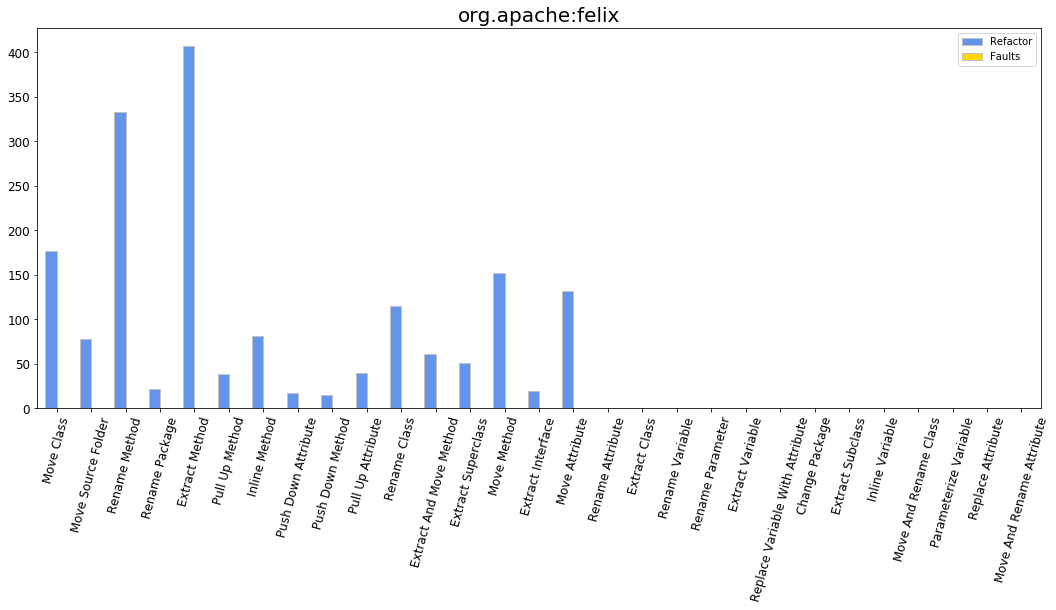

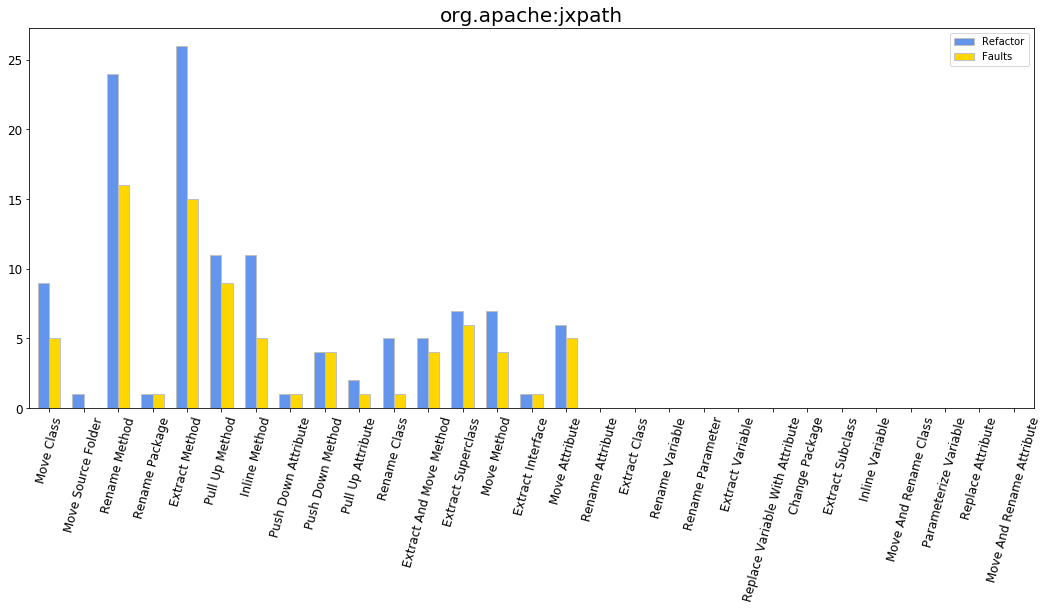

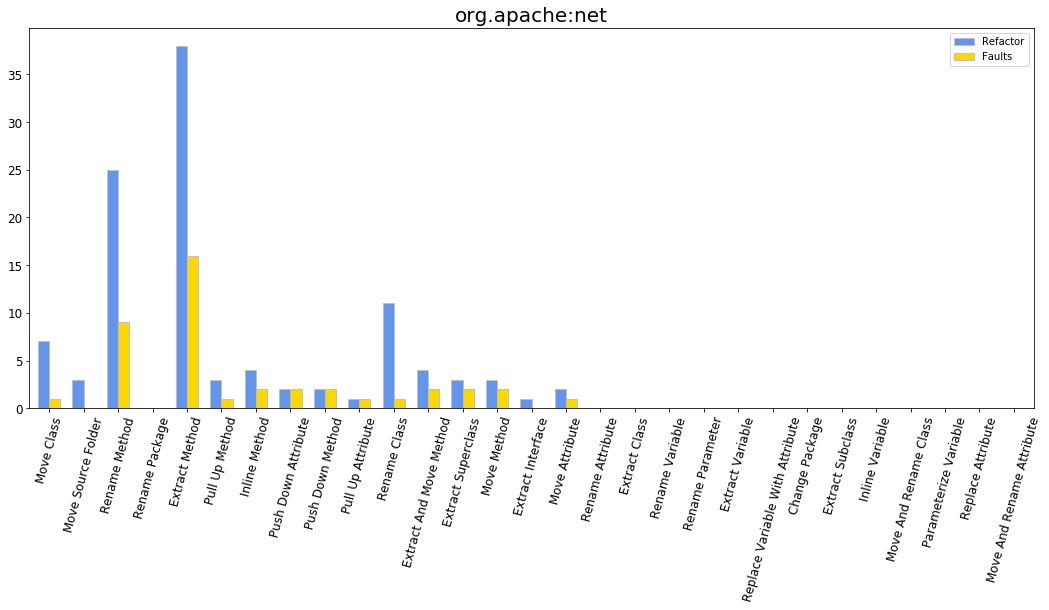

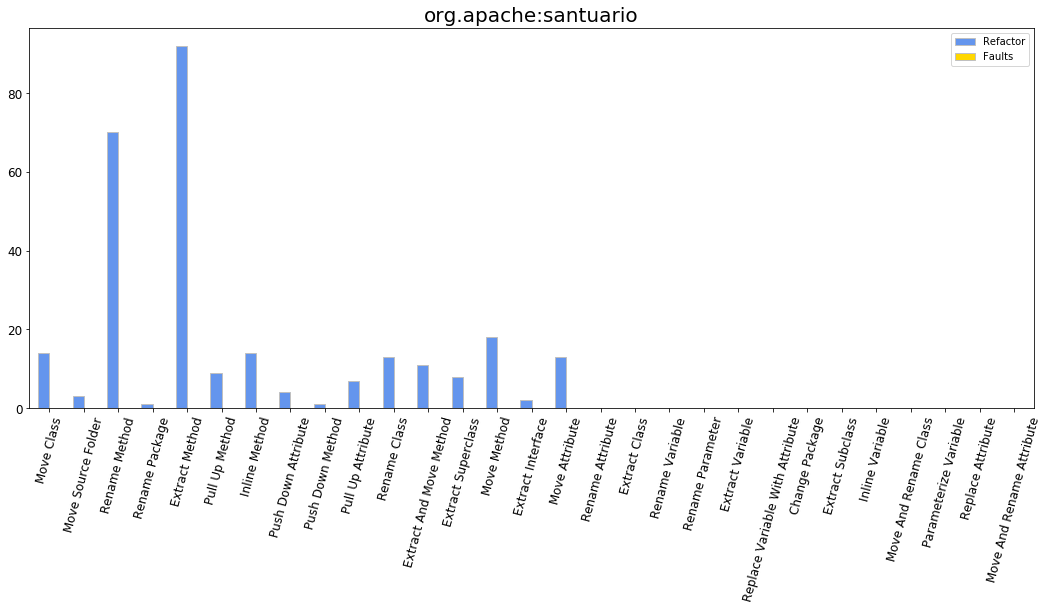

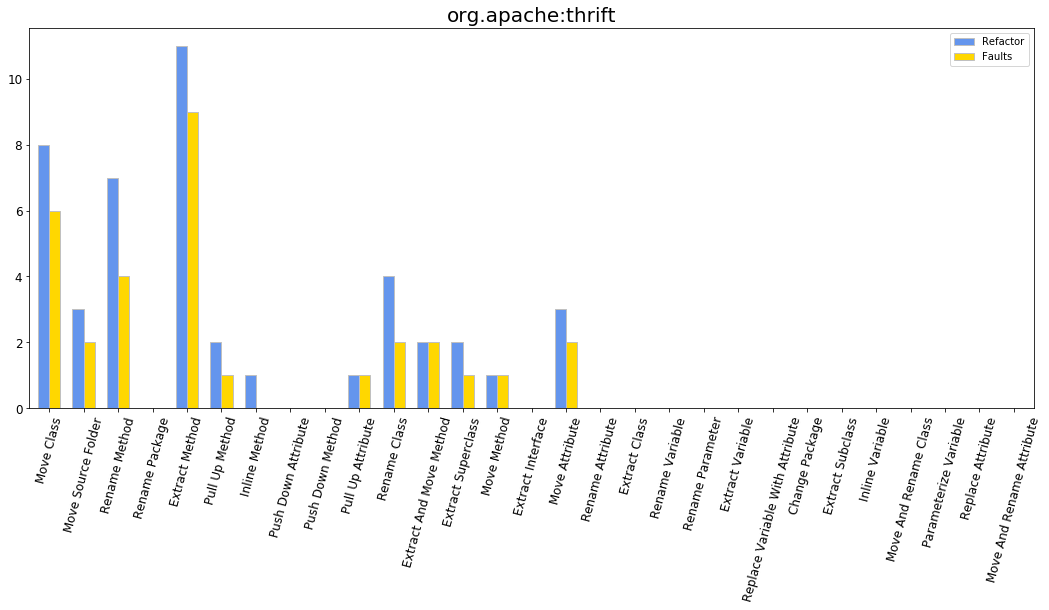

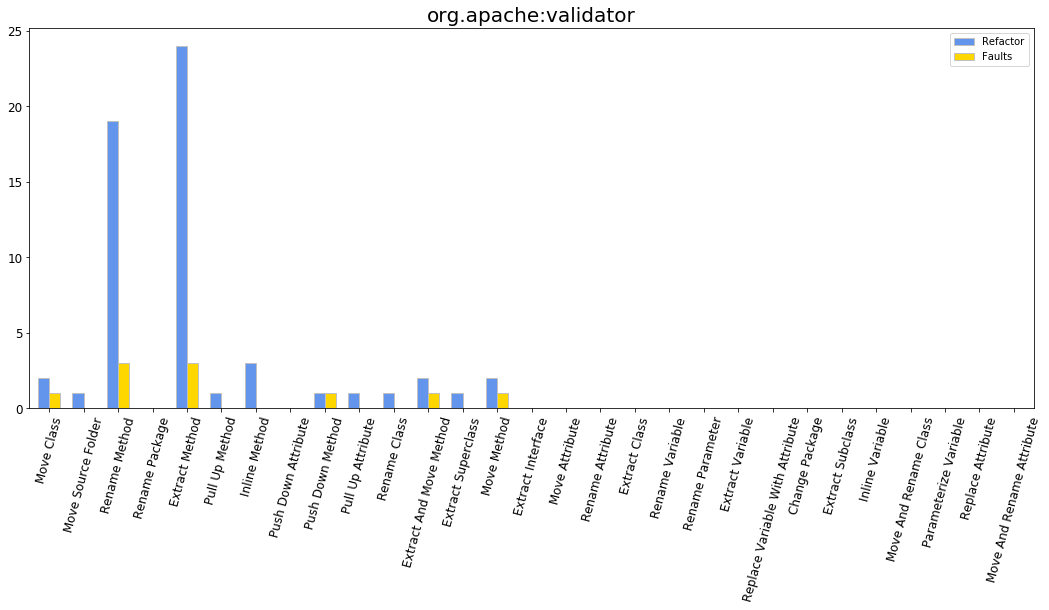

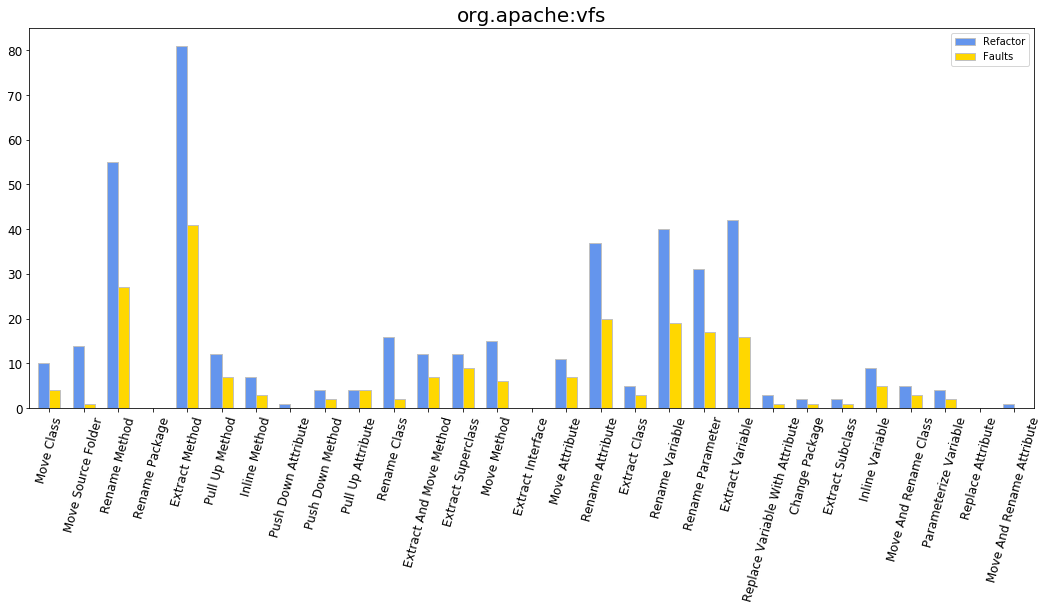

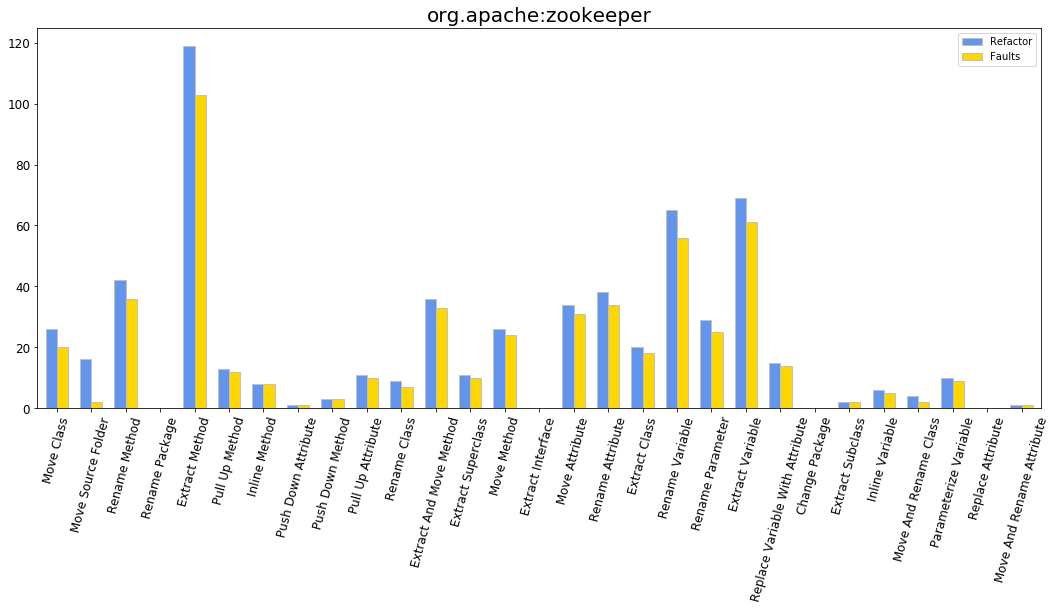

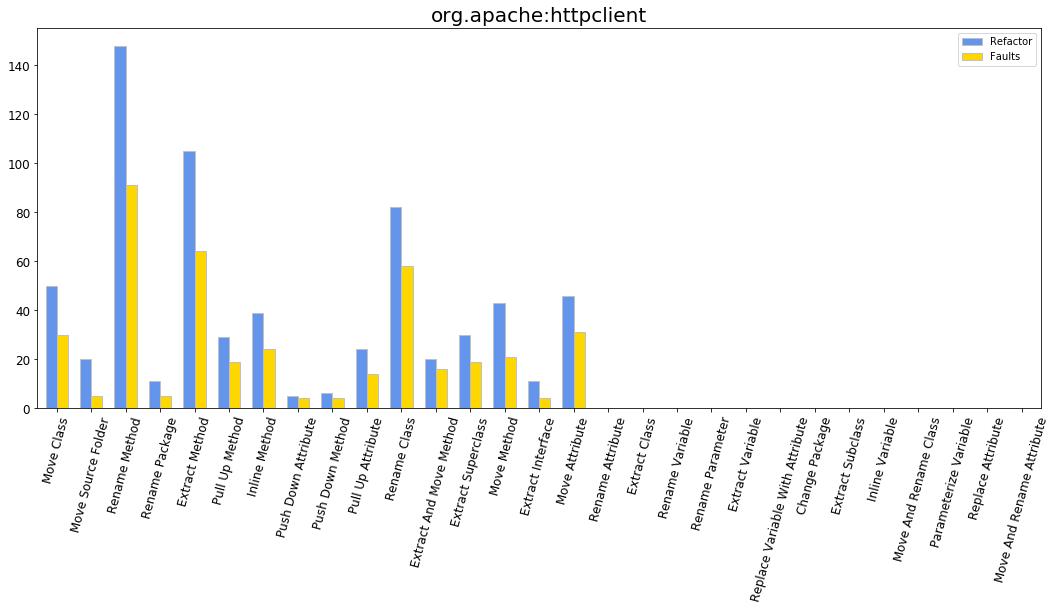

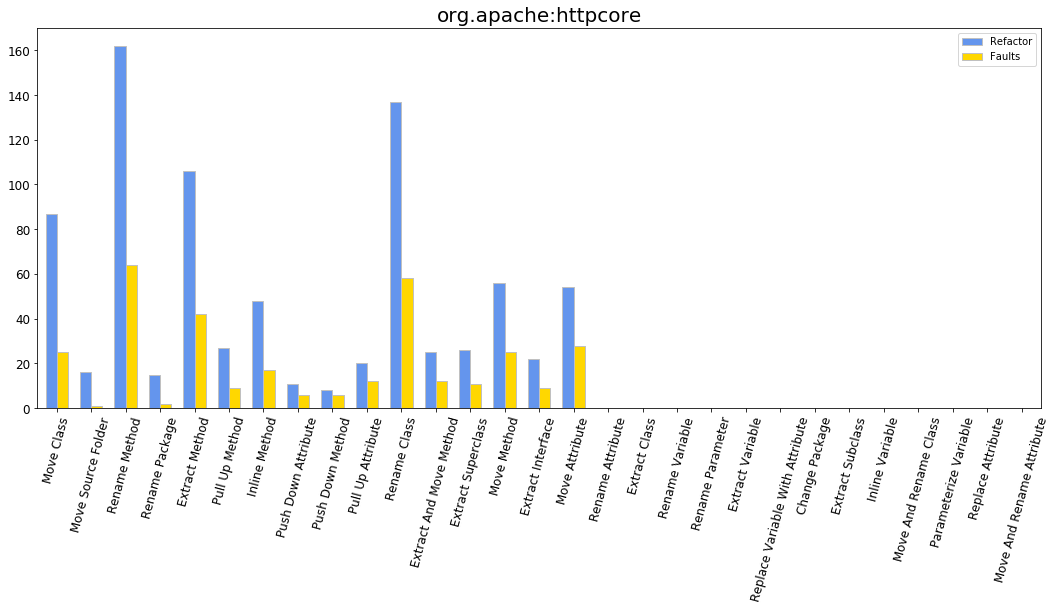

In [25]:
for i in szz_fault_inducing_commits.PROJECT_ID.unique():
    refact = pd.Series(pd.DataFrame(projects_refactor)[i], name="Refactor")
    faults = pd.Series(pd.DataFrame(projects_faults)[i], name="Faults")

    pd.concat([refact, faults], axis=1).plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=12, color=('cornflowerblue','gold'),edgecolor = 'silver')
    plt.title(i, fontsize=20)